# *Solución del Parcial 1*

**Asignatura**: Aprendizaje de máquina y Análisis de datos

**Integrantes**:

1.   Guido Ernesto Salazar / guidosalazar@javerianacali.edu.co
2.   Juan Jose Marin / juanjo145@javerianacali.edu.co
3.   Dilan Andres Correa / dilancorrea@javerianacali.edu.co

**Fecha**: 18/03/2024

# Parcial 1 de ML

Guido Salazar & Dilan Correa

## Codigos

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed
import plotly.graph_objs as go
import seaborn as sns

### Perceptron

In [ ]:
class Perceptron(object):
    """Clasificador Perceptron.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.
    |Rw: int
      (Rw; Random weights), Tipo de forma en la cual se generaran el bias y pesos aleatorios.

      Si se usa por defecto 0:

      ** Es un vector que contiene pequeños números aleatorios extraídos de una distribución normal
      con distribución normal y desviación estandar 0.01

      Si se usa 1:

      ** Valores aleatorios en el rango de -25 a +25, asegurándose de que ninguno sea igual a cero
      excepto el primer valor, que es el bias. Los valores que se hubieran generado como cero se reemplazarán
      por valores muy pequeños (0.0001) multiplicados por un factor aleatorio de -1 o 1.
    |Af: String
      (Af;Activation Function), Tipo de función de aprendizaje: step_function o bipolar_step_function.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |errors_ : list
      Número de clasificaciones erróneas (actualizaciones) en cada época.
    |w_historical: list
      Almacena todos los valores de bias y pesos obtenidos en cada época:

      [Pesos iniciales, Pesos_iter1, Pesos_inter2,....Pesos_n_iter]

      La dimensión de la lista es: 1 x (1 + n_iter)

    """
    #FUNCIÓN PARA INICIALIZAR MI PERCEPTRON
    def __init__(self, eta=0.01, n_iter=50, Af='step_function', Rw=0 , random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.Rw = Rw
        self.Af = Af


    #FUNCIÓN PARA ENTRENAR MI CONJUNTO DE DATOS USANDO MI PERCEPTRON
    def fit(self, X, y):
        """Datos de entrenamiento para ajustar.

        Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Retorna
        -------
        self : objeto

        """
        rgen = np.random.RandomState(self.random_state)

        if(self.Rw == 0):
          self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        elif(self.Rw == 1):
          lower_bound = -25
          upper_bound = 25
          self.w_ = rgen.uniform(low=lower_bound, high=upper_bound, size=1 + X.shape[1])
          # Asegurar que ningún valor sea igual a cero, excepto el primer valor
          self.w_[1:] = np.where(self.w_[1:] == 0, np.random.choice([-1, 1], size=self.w_[1:].shape) * 0.0001, self.w_[1:])
        else:
          print("Error, solo se puede usar 0 o 1.")

        """
        Genera el vector de pesos de manera aleatoria [Un peso W1 hasta ...Wn]
        Donde n, corresponde al número de caractarísticas de que presente las
        muestras del dataset + 1 elemento adicional que es el BIAS.
        """


        """
        Incializa el vector de errores vacio, dado que lo llenará en función de
        cada iteración.
        """

        self.errors_ = []
        self.w_historical = [self.w_.copy()]  # Agrega los pesos iniciales a la lista

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.w_historical.append(self.w_.copy())  # Guarda una copia de los pesos actuales en cada iteración
        return self

    def net_input(self, X):
        """Calcular la entrada NETA:"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        Activation_function = self.Af

        """Devolver el valor de predicción final (pasando por la función de activación)"""

        if(Activation_function =='step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, 0)
        elif(Activation_function =='bipolar_step_function'):
          return np.where(self.net_input(X) >= 0.0, 1, -1)
        else:
          print("Error, solo puede ser 'step_function' o 'bipolar_step_function'")

### AdalineGD

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parámetros
    ------------
    |eta : float
      Tasa de aprendizaje (entre 0.0 y 1.0)
    |n_iter : int
      Número de iteraciones sobre el dataset.
    |random_state : int
      Semilla del generador de números aleatorios para la inicialización del bias y pesos aleatorios.


    Atributos
    -----------
    |w_ : Arreglo 1D
      Pesos antes del entrenamiento (Iniciales).
    |cost_  : list
      Valro de la función de costo de suma de cuadrados en cada época.


    """
    #FUNCIÓN PARA INICIALIZAR MI ADALINE
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Datos de entrenamiento para ajustar.

          Parameters
        ----------
        X : {Tipo matriz}, Dimensión = [n_muestras, n_características]
          Training vectors, donde n_muestras es el número de muestras y
          n_características es el número de características.
        y : Tipo vector fila, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)


        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):

            #Se calcula la NETA para todos los valores de entrada
            net_input = self.net_input(X)

            #Observe por favor que a continuación se llama a la función de activación
            #Pero en realidad no tiene efecto, se podría colocar directamente:
            #output = self.net_input(X)
            #Pero el propósito es dejar dispuesto el código para usar la función de activación en otros casos.
            output = self.activation(net_input)

            errors = (y - output)

            self.w_[1:] += self.eta * X.T.dot(errors)

            self.w_[0] += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcula el valor neto (Z)"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Función de activación lineal"""
        return X

    def predict(self, X):
        """Retonar el valor de clase perteneciente"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Dataset Punto 1 EA

Al realizar las gráficas de la data-set, con el gráfico de diferencias (el primer gráfico que aparece en esta sección) podemos identificar que las diferencias son mayores entre las características _variance_ y la clase _curtosis_. A partir de este análisis, tomaremos para el desarrollo de este proyecto estas dos características.

Sin embargo, llevaremos a cabo el parcial con las características _skewness_ y _curtosis_ para evidenciar cuál de las dos combinaciones podrían resultar mejor.

### Importación de la base de datos:

In [ ]:
data_set = pd.read_csv("data_parcial.csv")
print(data_set)
print(data_set.head())
print(data_set.shape)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
(1372, 5)


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
data_set.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
data_set["class"].value_counts().to_frame()

,count
class,
0,762
1,610


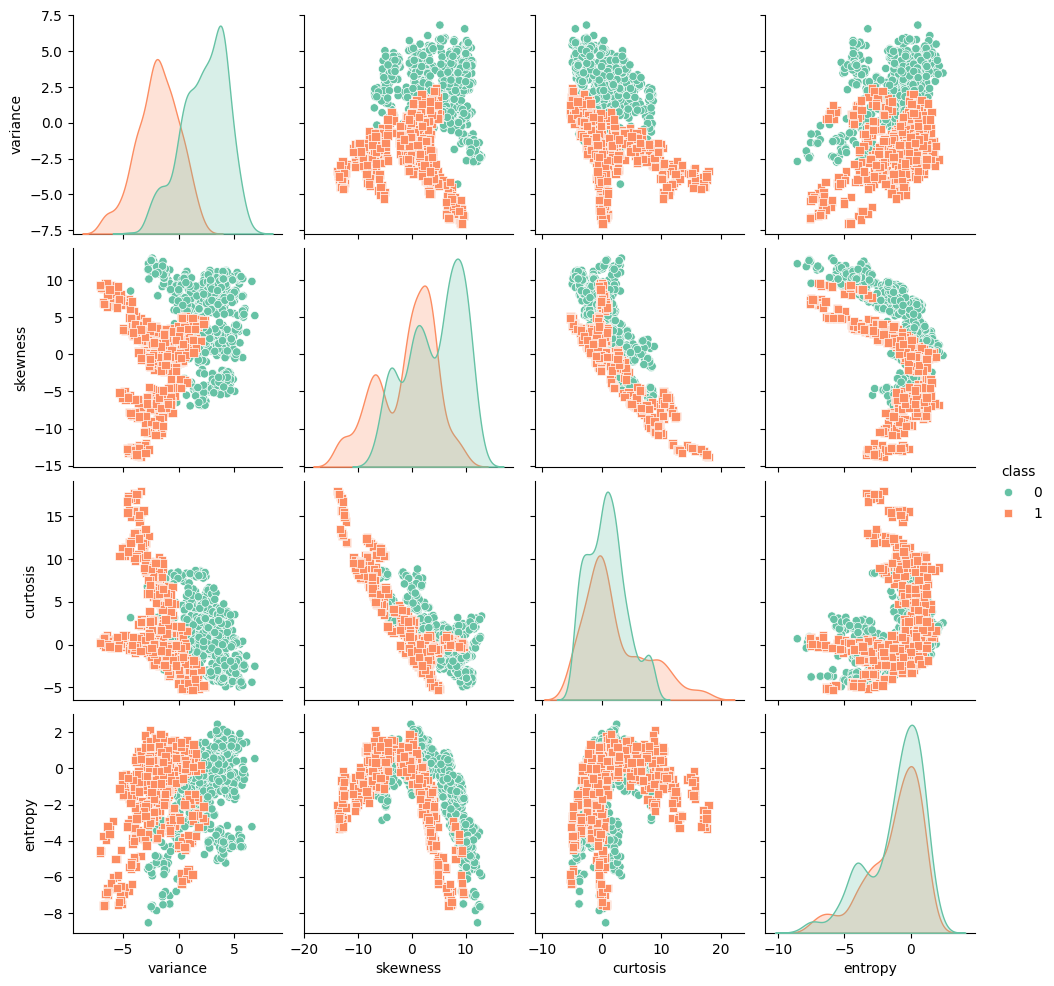

In [ ]:
sns.pairplot(data_set, hue="class", markers=["o", "s"], palette="Set2")

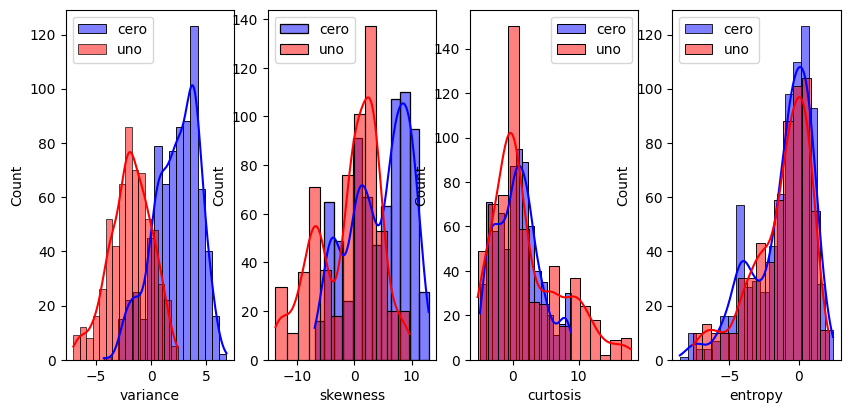

In [ ]:
cero = data_set[data_set["class"] == 0]
uno = data_set[data_set["class"] == 1]
caracteristica = data_set.columns[:-1]

# Crear un gráfico de 2x4 subplots para los histogramas
plt.figure(figsize=(10, 10))
for i, feature in enumerate(caracteristica, 1):
    plt.subplot(2, 4, i)
    sns.histplot(cero[feature], color="blue", label="cero", kde=True)
    sns.histplot(uno[feature], color="red", label="uno", kde=True)
    plt.xlabel(feature)
    plt.legend()

plt.show()


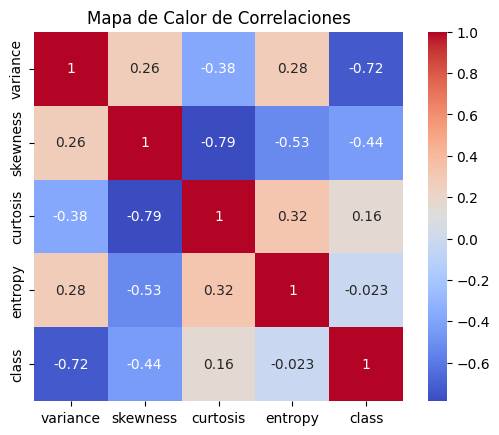

In [ ]:
correlation_matrix = data_set.corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

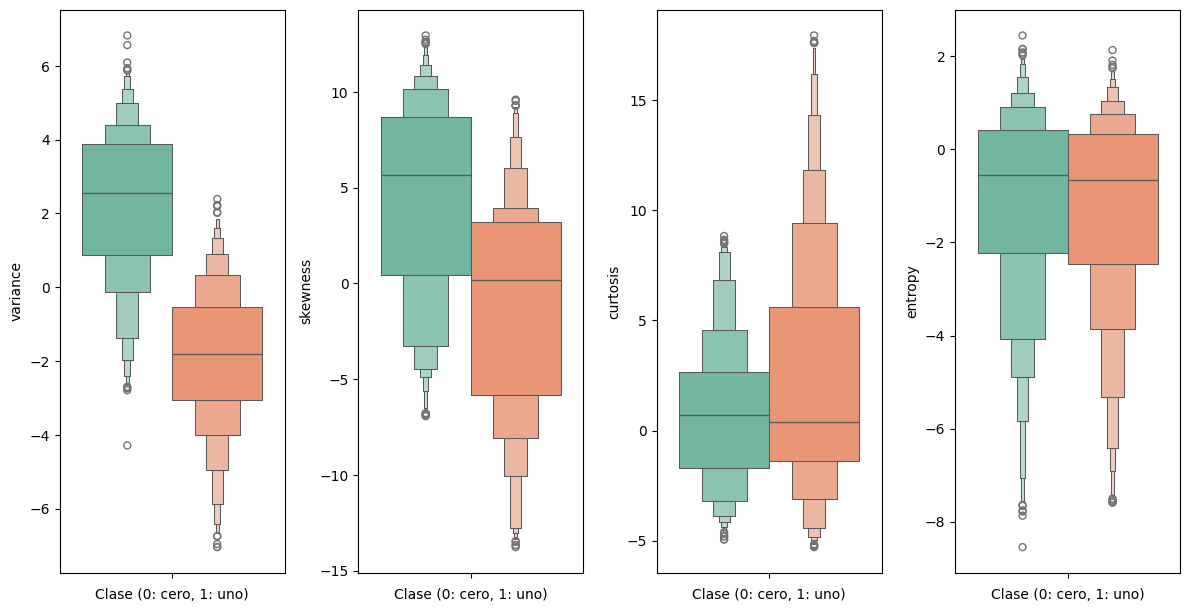

In [ ]:
caracteristica = data_set.columns[:-1]

plt.figure(figsize=(12, 12))
for i, feature in enumerate(caracteristica, 1):
    plt.subplot(2, 4, i)
    sns.boxenplot(hue="class", y=feature, data=data_set, palette="Set2", legend=False)
    plt.xlabel("Clase (0: cero, 1: uno)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


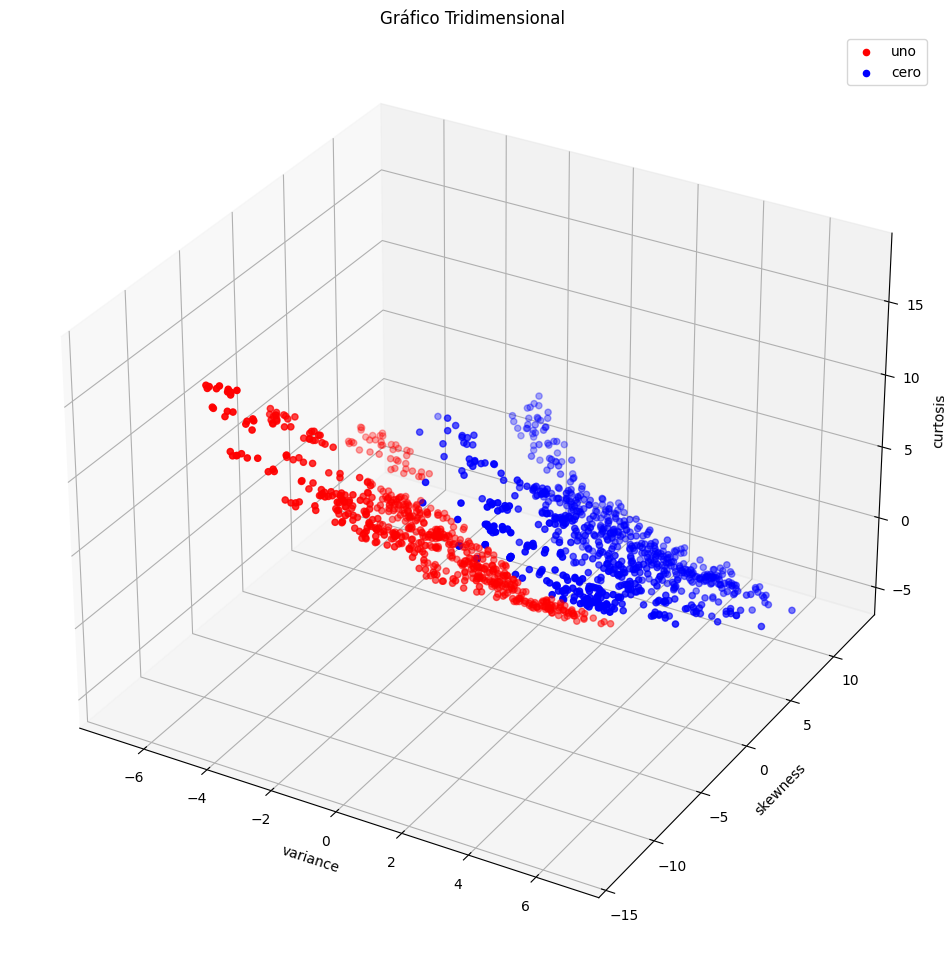

In [ ]:
cero = data_set[data_set["class"] == 0]
uno = data_set[data_set["class"] == 1]
caracteristica = data_set.columns[:-1]

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

# Datos para los ejes
diabetes_gen = [uno, cero]
labels = ["uno", "cero"]
llaves = ["variance", "skewness", "curtosis"]
color = ["red", "blue"]

for i in range(len(diabetes_gen)):
  x = diabetes_gen[i][llaves[0]]
  y = diabetes_gen[i][llaves[1]]
  z = diabetes_gen[i][llaves[2]]
  ax.scatter(x, y, z, c=color[i], label=labels[i])

ax.set_xlabel(llaves[0])
ax.set_ylabel(llaves[1])
ax.set_zlabel(llaves[2])

plt.title("Gráfico Tridimensional")
plt.legend()
plt.show()


## Punto 2

In [ ]:
#Modelos entre varianza y Curtosis

x = data_set.iloc[:]
print(x)
Xvc = data_set.iloc[:, [0, 2]].values
Xsc = data_set.iloc[:, [1, 2]].values
Xvs = data_set.iloc[:, [0, 1]].values

y = data_set.iloc[:, [4]]

y = np.where(y == 0, 0, 1)

#Modelos entre skewnes y curtosis

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


## Punto 3

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generar datos aleatorios para 'variance' y 'curtosis' dentro de los rangos dados
# np.random.seed(1)  # Para reproducibilidad
# variance = np.random.uniform(-7.042100, 6.824800, 1000)
# curtosis = np.random.uniform(-5.286100, 17.927400, 1000)

# # Combinar 'variance' y 'curtosis' en una matriz de características X
# X = np.column_stack((variance, curtosis))

# # Generar etiquetas aleatorias para y
# y = np.random.choice([-1, 1], size=1000)

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xvc, y, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xsc, y, test_size=0.2, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xvs, y, test_size=0.2, random_state=1)

In [ ]:
# Crear una instancia del Perceptron con los parámetros deseados
ppn = [Perceptron(eta=0.01, n_iter=50, Af='step_function', Rw=0, random_state=1) for i in range(3)]

# Entrenar el perceptrón con el conjunto de entrenamiento
ppn[0].fit(X_train1, y_train1)
ppn[1].fit(X_train2, y_train2)
ppn[2].fit(X_train3, y_train3)

# Ahora puedes usar 'X_test' e 'y_test' para evaluar el modelo

<ipython-input-2-ff2bc5182617>:102: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w_[0] += update
<ipython-input-2-ff2bc5182617>:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors += int(update != 0.0)


**Conclusiones**: Se usan dos perceptrones. Decidimos tomar dos combinaciones de dos características porque eran las que mejor correlación tenían.


# Punto 4



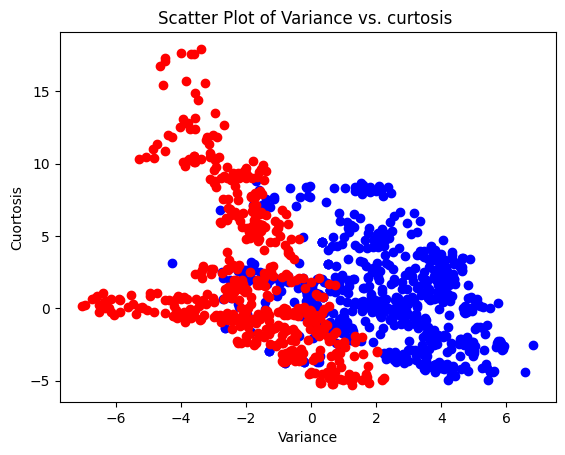

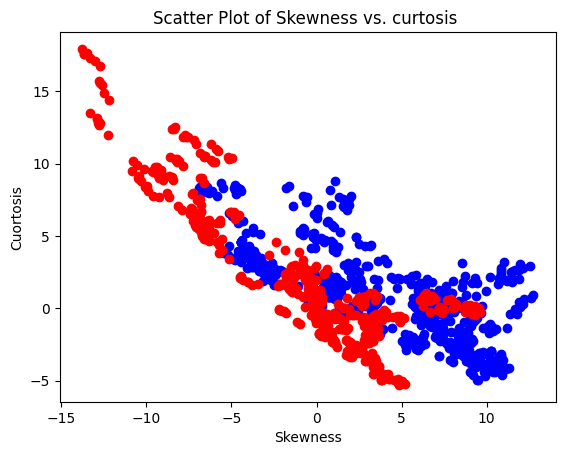

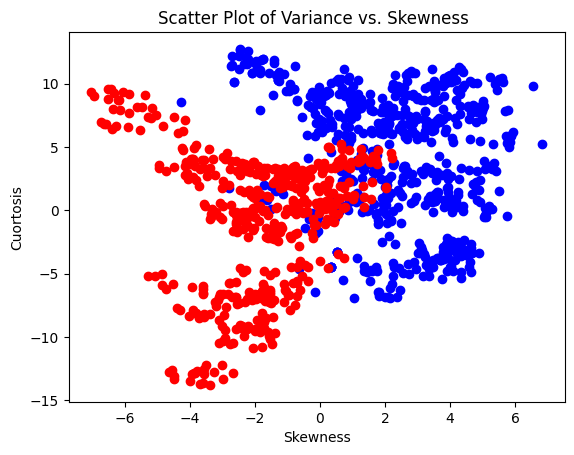

In [ ]:
x0 = [X_train1[i][0] for i in range(len(X_train1)) if y_train1[i] == 0]
x1 = [X_train1[i][1] for i in range(len(X_train1)) if y_train1[i] == 0]
plt.scatter(x0, x1, color="blue")
x0 = [X_train1[i][0] for i in range(len(X_train1)) if y_train1[i] == 1]
x1 = [X_train1[i][1] for i in range(len(X_train1)) if y_train1[i] == 1]
plt.scatter(x0, x1, color="red")
plt.xlabel('Variance')
plt.ylabel('Cuortosis')
plt.title('Scatter Plot of Variance vs. curtosis ')
plt.show()

x0 = [X_train2[i][0] for i in range(len(X_train2)) if y_train2[i] == 0]
x1 = [X_train2[i][1] for i in range(len(X_train2)) if y_train2[i] == 0]
plt.scatter(x0, x1, color="blue")
x0 = [X_train2[i][0] for i in range(len(X_train2)) if y_train2[i] == 1]
x1 = [X_train2[i][1] for i in range(len(X_train2)) if y_train2[i] == 1]
plt.scatter(x0, x1, color="red")
plt.xlabel('Skewness')
plt.ylabel('Cuortosis')
plt.title('Scatter Plot of Skewness vs. curtosis ')
plt.show()

x0 = [X_train3[i][0] for i in range(len(X_train3)) if y_train3[i] == 0]
x1 = [X_train3[i][1] for i in range(len(X_train3)) if y_train3[i] == 0]
plt.scatter(x0, x1, color="blue")
x0 = [X_train3[i][0] for i in range(len(X_train3)) if y_train3[i] == 1]
x1 = [X_train3[i][1] for i in range(len(X_train3)) if y_train3[i] == 1]
plt.scatter(x0, x1, color="red")
plt.xlabel('Skewness')
plt.ylabel('Cuortosis')
plt.title('Scatter Plot of Variance vs. Skewness ')
plt.show()



**Conclusiones**:
A partir del punto 3 y del entrenamiento obtenido, podemos identificar que los gráficos de disperción son similares a los entregados en el punto 1. Teniendo en cuenta que sólo se tuvieron 50 iteraciones podemos decir que se tiene un acercamiento a la realidad.


Punto 5

Punto 5.1

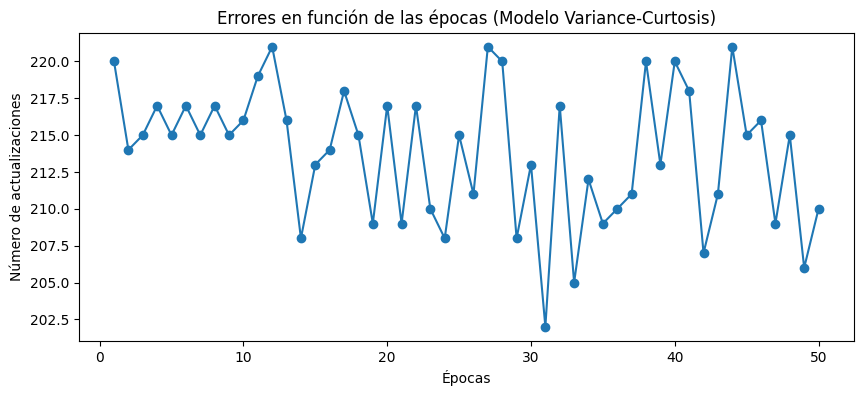

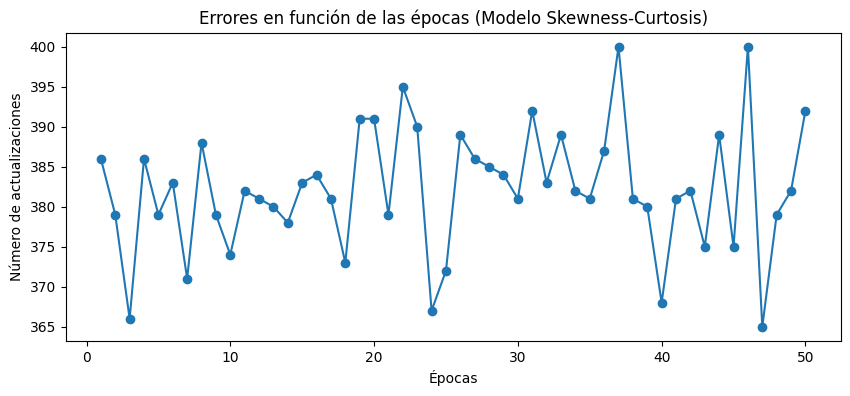

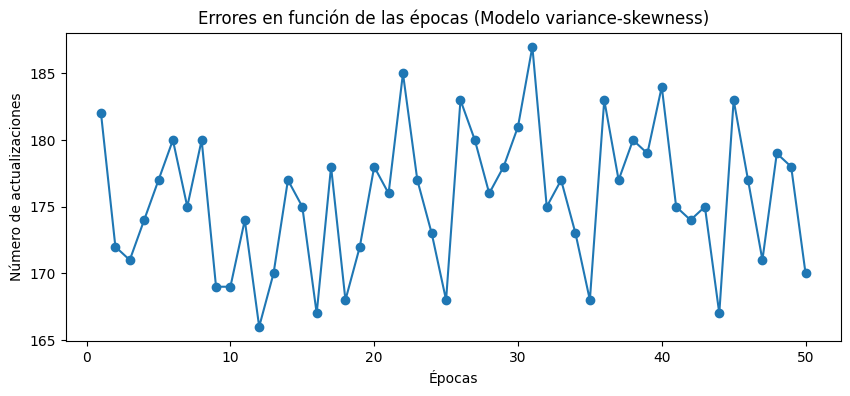

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'ppn' es tu lista de modelos de perceptrón ya entrenados
# y que cada perceptrón tiene un atributo 'errors_' que registra los errores en cada época

# Gráfico para el modelo entrenado con 'variance' y 'curtosis'
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(ppn[0].errors_) + 1), ppn[0].errors_, marker='o')
plt.title('Errores en función de las épocas (Modelo Variance-Curtosis)')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()

# Gráfico para el modelo entrenado con 'skewness' y 'curtosis'
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(ppn[1].errors_) + 1), ppn[1].errors_, marker='o')
plt.title('Errores en función de las épocas (Modelo Skewness-Curtosis)')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()

# Gráfico para el modelo entrenado con 'variance' y 'skewness'
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(ppn[2].errors_) + 1), ppn[2].errors_, marker='o')
plt.title('Errores en función de las épocas (Modelo variance-skewness)')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()


**Conclusiones:** Para este punto, realmente podemos identificar que con 50 iteraciones no estamos ni cerca de llegar al error 0, sin embargo, podemos apreciar que con las características _variance_ y _curtosis_ se tiene un valor menor en el valor de error, lo que quiere decir que a diferencia del _skewness_ y _curtosis_ estas variables presentan menos solapamientos permitiendo un menor error.



**Punto 5.2**

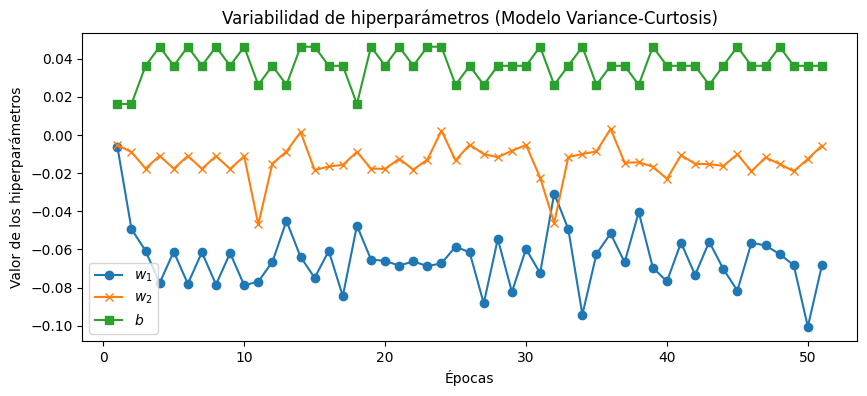

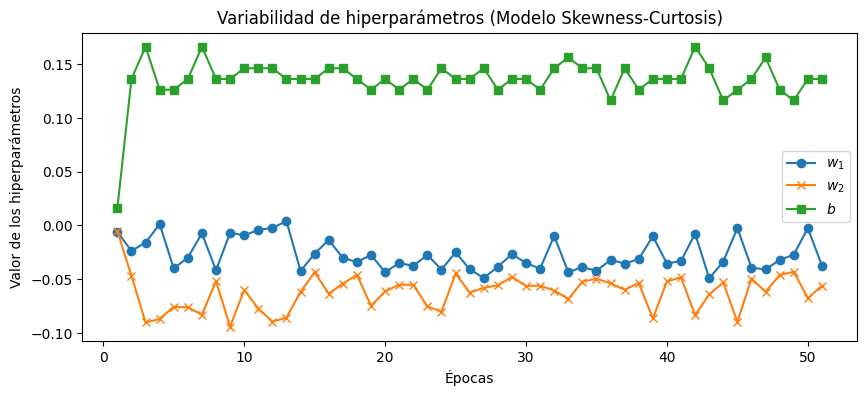

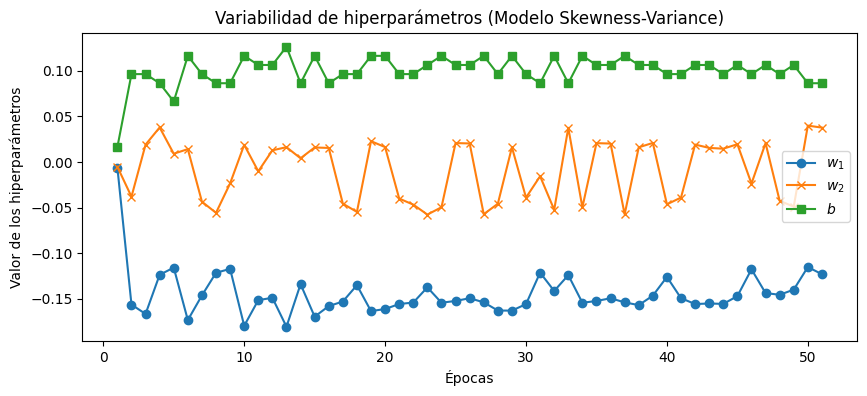

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la variabilidad de los hiperparámetros
def plot_hyperparameters(ppn, title):
    # Extraer los pesos y sesgos históricos
    weights = np.array(ppn.w_historical)
    w1 = weights[:, 1]  # Peso w1
    w2 = weights[:, 2]  # Peso w2
    b = weights[:, 0]   # Sesgo b

    # Épocas de entrenamiento
    epochs = np.arange(1, len(w1) + 1)

    # Gráfico para w1, w2 y b
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, w1, marker='o', label='$w_1$')
    plt.plot(epochs, w2, marker='x', label='$w_2$')
    plt.plot(epochs, b, marker='s', label='$b$')
    plt.title(title)
    plt.xlabel('Épocas')
    plt.ylabel('Valor de los hiperparámetros')
    plt.legend()
    plt.show()

# Graficar la variabilidad de los hiperparámetros para ambos modelos
plot_hyperparameters(ppn[0], 'Variabilidad de hiperparámetros (Modelo Variance-Curtosis)')
plot_hyperparameters(ppn[1], 'Variabilidad de hiperparámetros (Modelo Skewness-Curtosis)')
plot_hyperparameters(ppn[2], 'Variabilidad de hiperparámetros (Modelo Skewness-Variance)')


**Conclusiones:**

En los graficos se puede observar que las ponderaciones o los sesgos cambian drásticamente con el tiempo, lo cual indica que la red todavía está aprendiendo y ajustándose a los datos. Ademas al anilizar la variabilidad y estabilidad de los hiperparamtros nos indica que los hiperparamtros son inestables y sigue en fase de entrenamiento. Se puede notar que con diferentes hiperparametros tienen cambios bruscos a medida que pasa el tiempo.


**Punto 5.3**


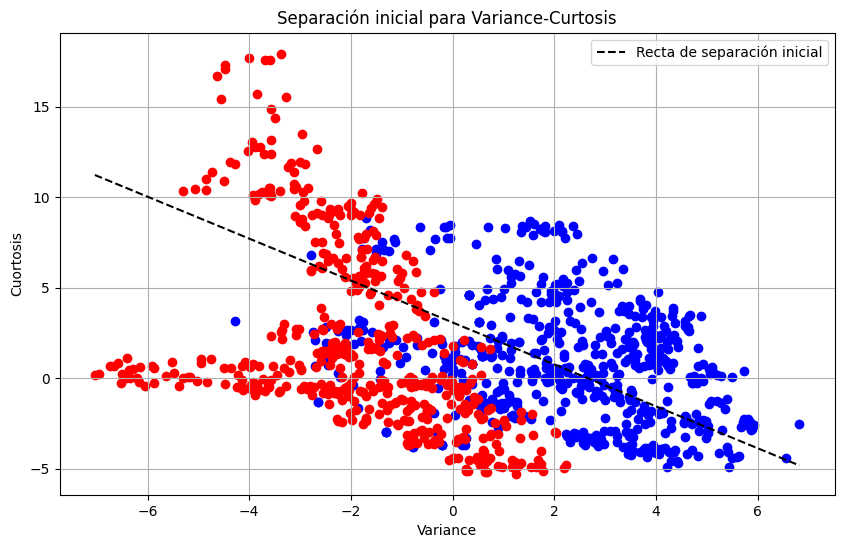

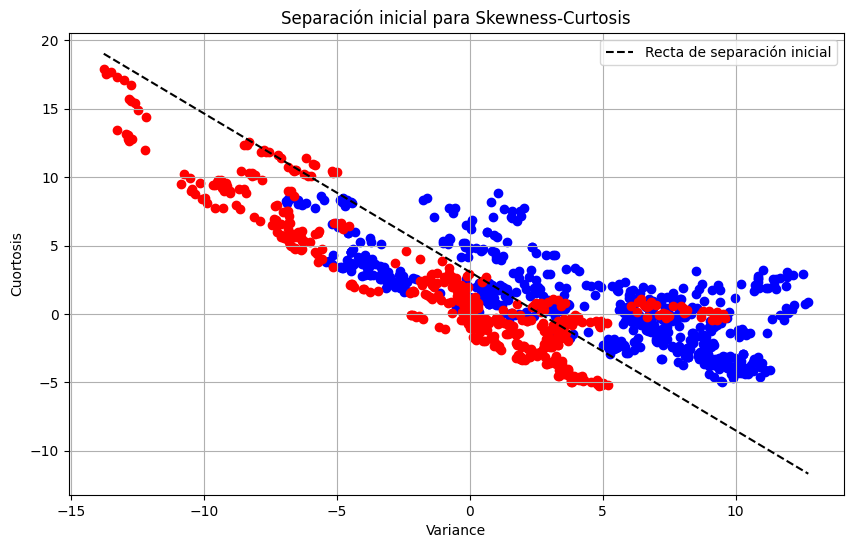

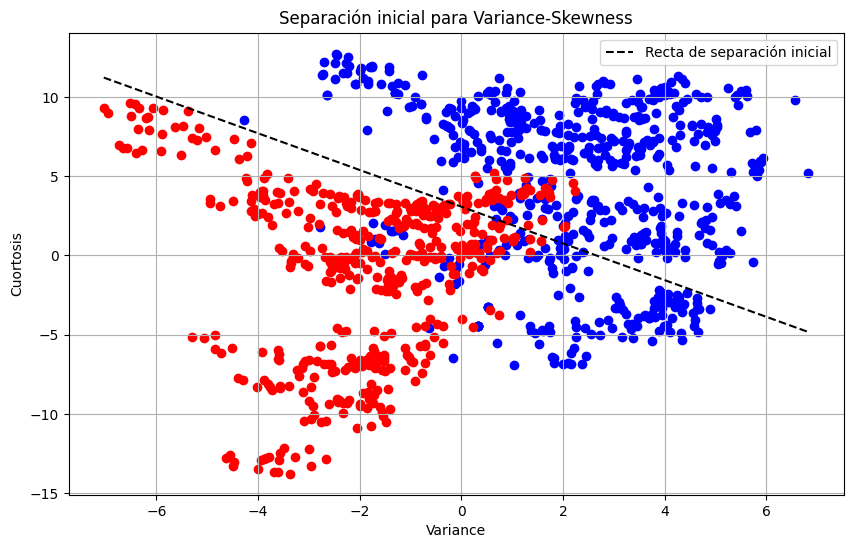

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar los datos y la recta de separación inicial
def plot_initial_decision_boundary(X, y, ppn, title):
    # Graficar los puntos de datos
    plt.figure(figsize=(10, 6))
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 0]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 0]
    plt.scatter(x0, x1, color="blue")
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 1]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 1]
    plt.scatter(x0, x1, color="red")
    plt.xlabel('Variance')
    plt.ylabel('Cuortosis')

    # Extraer los pesos iniciales
    w1, w2, b = ppn.w_historical[0][1], ppn.w_historical[0][2], ppn.w_historical[0][0]

    # Calcular la recta de separación
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = -(w1 / w2) * x_values - b / w2

    # Graficar la recta de separación
    plt.plot(x_values, y_values, 'k--', label='Recta de separación inicial')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar para el modelo entre 'variance' y 'curtosis'
plot_initial_decision_boundary(X_train1, y_train1, ppn[0], 'Separación inicial para Variance-Curtosis')

# Graficar para el modelo entre 'skewness' y 'curtosis'
plot_initial_decision_boundary(X_train2, y_train2, ppn[1], 'Separación inicial para Skewness-Curtosis')

plot_initial_decision_boundary(X_train3, y_train3, ppn[2], 'Separación inicial para Variance-Skewness')


**Punto 5.4**


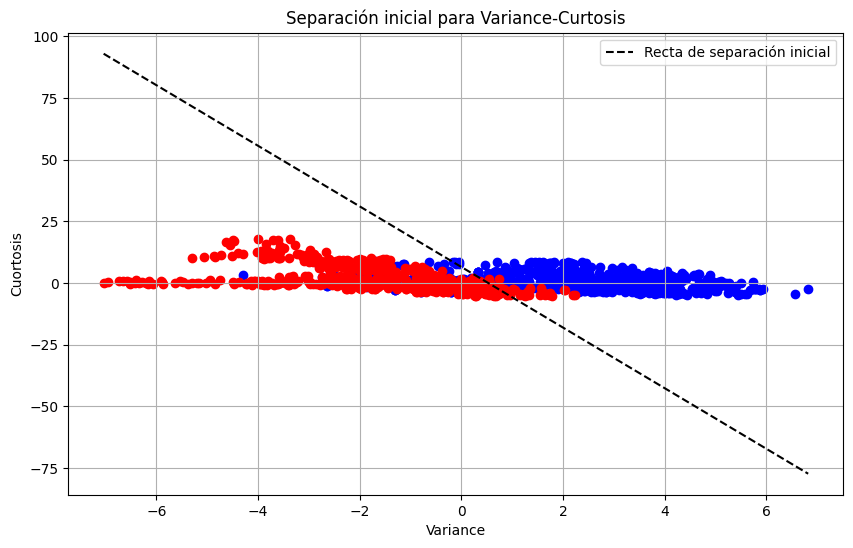

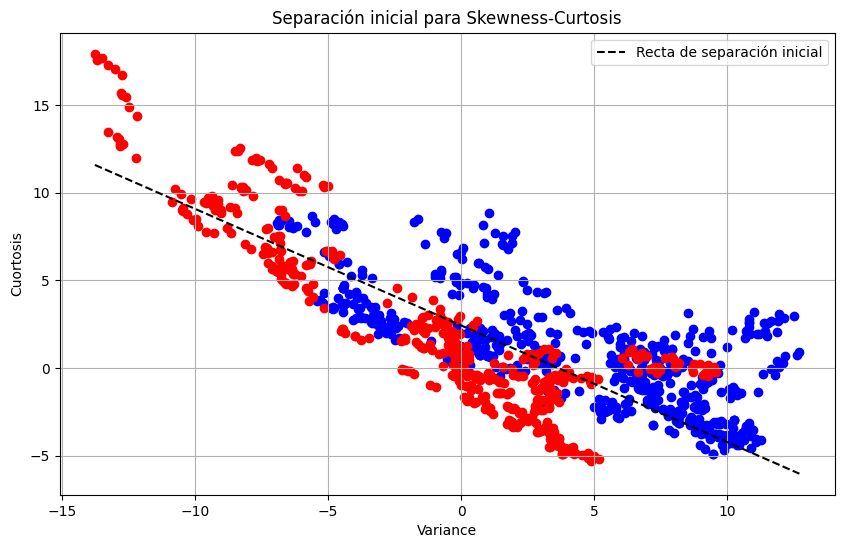

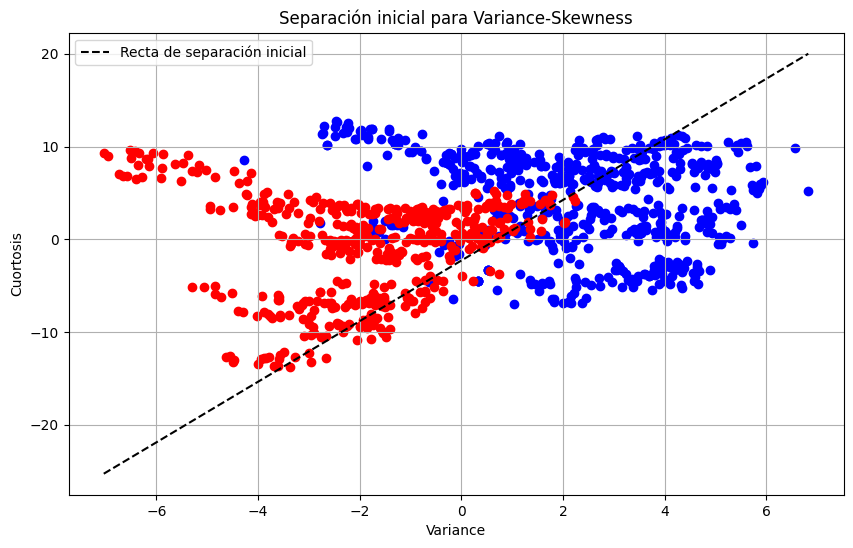

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para graficar los datos y la recta de separación inicial
def plot_initial_decision_boundary(X, y, ppn, title):
    # Graficar los puntos de datos
    plt.figure(figsize=(10, 6))
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 0]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 0]
    plt.scatter(x0, x1, color="blue")
    x0 = [X[i][0] for i in range(len(X)) if y[i] == 1]
    x1 = [X[i][1] for i in range(len(X)) if y[i] == 1]
    plt.scatter(x0, x1, color="red")
    plt.xlabel('Variance')
    plt.ylabel('Cuortosis')

    # Extraer los pesos iniciales
    w1, w2, b = ppn.w_historical[-1][1], ppn.w_historical[-1][2], ppn.w_historical[-1][0]

    # Calcular la recta de separación
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = -(w1 / w2) * x_values - b / w2

    # Graficar la recta de separación
    plt.plot(x_values, y_values, 'k--', label='Recta de separación inicial')

    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar para el modelo entre 'variance' y 'curtosis'
plot_initial_decision_boundary(X_train1, y_train1, ppn[0], 'Separación inicial para Variance-Curtosis')

# Graficar para el modelo entre 'skewness' y 'curtosis'
plot_initial_decision_boundary(X_train2, y_train2, ppn[1], 'Separación inicial para Skewness-Curtosis')

plot_initial_decision_boundary(X_train3, y_train3, ppn[2], 'Separación inicial para Variance-Skewness')

**Conclusiones:**
En esta sección podemos identificar que antes de realizar el entrenamiento con el perceptron (figuras 5.4) la separabilidad de los hiperparámetros no se encuentran de la mejor manera, es decir, se evidencia que hay hiperpárametros mezclados en ambas características.

Por otro lado, en estas figuras podemos evidenciar que tras terminar el entrenamiento del perceptron se idenfitica una mejor separabilidad. También, podemos identificar tras el entrenamiento, que las características _variance_ y _curtosis_ presentan una mejor respuesta con el entrenamiento que _skewness_ y _curtosis_ .

**Punto 5.5**


In [ ]:
y_predictions_ppn_1 = ppn[0].predict(X_test1)
y_predictions_ppn_2 = ppn[1].predict(X_test2)
y_predictions_ppn_3 = ppn[2].predict(X_test3)

print(np.transpose(y_predictions_ppn_1))
print(np.transpose(y_test1))

print(np.transpose(y_predictions_ppn_2))
print(np.transpose(y_test2)
)
print(np.transpose(y_predictions_ppn_3))
print(np.transpose(y_test3))

[1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
[[1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1
  1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
  1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0
  0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0
  0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0
  1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1

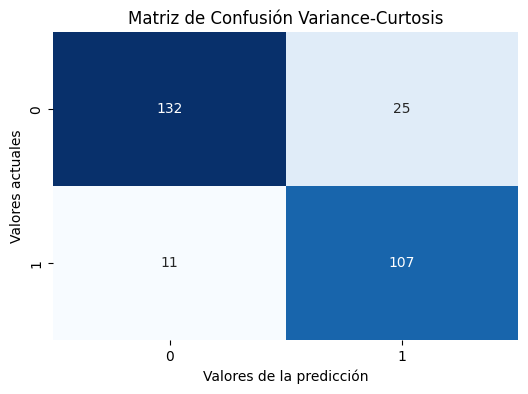

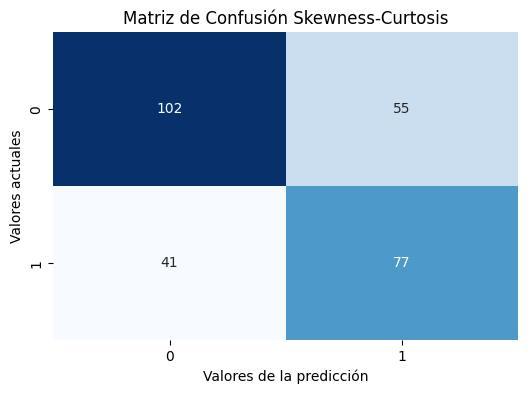

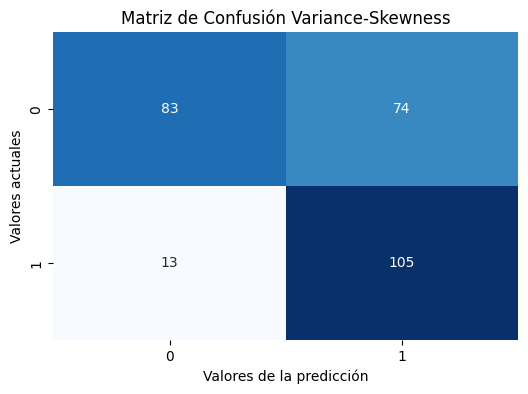

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_ppn_1 = confusion_matrix(y_test1, y_predictions_ppn_1)
cm_ppn_2 = confusion_matrix(y_test2, y_predictions_ppn_2)
cm_ppn_3 = confusion_matrix(y_test3, y_predictions_ppn_3)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Variance-Curtosis')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_2, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Skewness-Curtosis')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_3, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Variance-Skewness')
plt.show()

**Conclusiones:**

Con este gráfico podemos evidenciar que los datos están dividos de manera clara y se puede mostrar una correlación casi directa. Se evidencia, que la combinación _variance_ - _curtosis_ presenta una mejor correlación con respecto a la combinación _skewness_ - _curtosis_.


**Punto 5.6**

In [ ]:
class metricas_matriz_confusion(object):

  #
    def __init__(self, cm):
        self.TP = cm[1][1]
        self.FP = cm[0][1]
        self.FN = cm[1][0]
        self.TN = cm[0][0]

        self.accuracy = (self.TP+self.TN)/(self.TP+self.FP+self.FN+self.TN)
        self.error_rate = (self.FP+self.FN)/(self.TP+self.FP+self.FN+self.TN)
        self.precision = (self.TP)/(self.TP+self.FP)
        self.recall = (self.TP)/(self.TP+self.FN)
        self.especificity = (self.TN)/(self.TN+self.FP)

In [ ]:
metrics_ppn_1 = metricas_matriz_confusion(cm_ppn_1)
print("Modelo Variance-Curtosis")
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))
print()

print("Modelo Skewness-Curtosis")
metrics_ppn_1 = metricas_matriz_confusion(cm_ppn_2)
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

print("Modelo Skewness-Variance")
metrics_ppn_1 = metricas_matriz_confusion(cm_ppn_3)
print("El valor de exactitud (accuracy) es: " + str(metrics_ppn_1.accuracy))
print("El valor de tasa de error (error_rate) es: " + str(metrics_ppn_1.error_rate))
print("El valor de precisión (precision) es: " + str(metrics_ppn_1.precision))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(metrics_ppn_1.recall))
print("El valor de especificidad (especificity) es: " + str(metrics_ppn_1.especificity))

Modelo Variance-Curtosis
El valor de exactitud (accuracy) es: 0.8690909090909091
El valor de tasa de error (error_rate) es: 0.13090909090909092
El valor de precisión (precision) es: 0.8106060606060606
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.9067796610169492
El valor de especificidad (especificity) es: 0.8407643312101911

Modelo Skewness-Curtosis
El valor de exactitud (accuracy) es: 0.6509090909090909
El valor de tasa de error (error_rate) es: 0.3490909090909091
El valor de precisión (precision) es: 0.5833333333333334
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.652542372881356
El valor de especificidad (especificity) es: 0.6496815286624203
Modelo Skewness-Variance
El valor de exactitud (accuracy) es: 0.6836363636363636
El valor de tasa de error (error_rate) es: 0.31636363636363635
El valor de precisión (precision) es: 0.5865921787709497
El valor de recall (sensibilidad / sensitivity / true positive rate) es: 0.88983050847



**Conclusiones:** Con estos resultados podemos identificar finalmente que la combinación de características de _variance_ y _curtosis_ presenta mejores resultados que la combinación _skewness_ y _curtosis_. A simple ojeada, podemos ver que al menos desde el valor de exactitud presenta un valor mucho mayor. Esto nos indica que las características _variance_ - _curtosis_ presenta una mejor correlación y separabilidad.




## Punto 6

[539.1761011392232, 307784832.48126507, 867460041766851.0, 4.073617384663095e+21, 2.09933392108247e+28, 1.0946871810153528e+35, 5.716200554265694e+41, 2.985361644437156e+48, 1.5591753544887727e+55, 8.143179003058516e+61, 4.252977849732937e+68, 2.2212235749863107e+75, 1.160089321721548e+82, 6.058855354039658e+88, 3.1643880790719016e+95, 1.652680470141863e+102, 8.631535286251847e+108, 4.508034235524186e+115, 2.3544331332373183e+122, 1.2296613311414054e+129, 6.422212497601823e+135, 3.3541603952096607e+142, 1.7517937877319027e+149, 9.149179267392375e+155, 4.778386694432854e+162, 2.4956314368994344e+169, 1.3034056611820417e+176, 6.807360624179606e+182, 3.555313594817875e+189, 1.8568510551062745e+196, 9.697867006372774e+202, 5.064952528888251e+209, 2.6452975796671216e+216, 1.3815725310516741e+223, 7.215606566262843e+229]
[539.1761011392232, 3029904.5980519033, 85096164704.13104, 3975646954896369.0, 2.033882891812201e+20, 1.0523163342178878e+25, 5.451828082232214e+29, 2.8249129721602045e+34, 

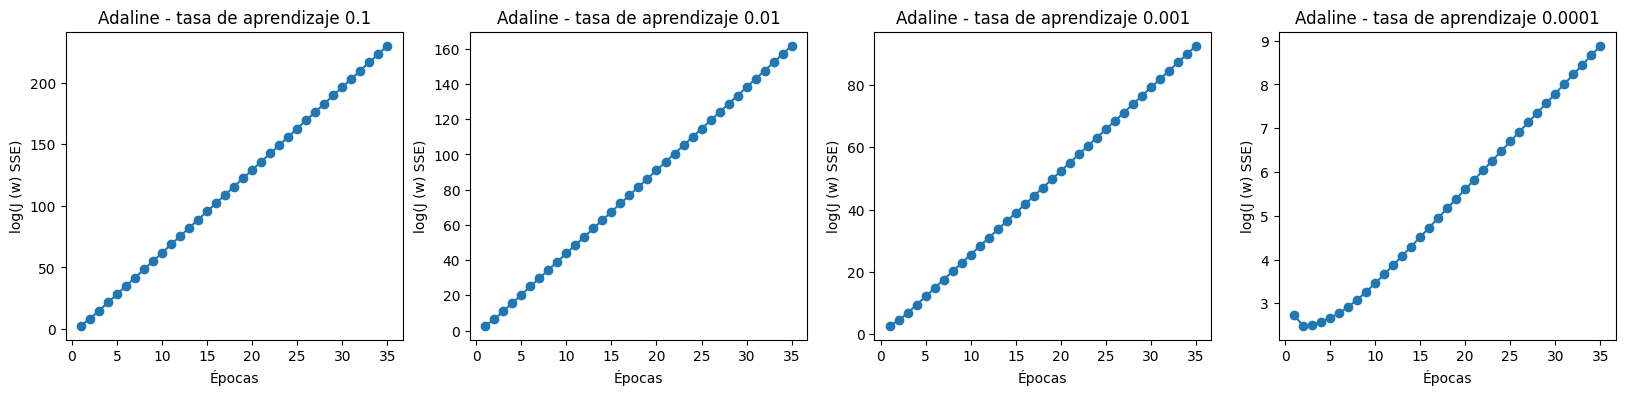

In [ ]:
ada = [AdalineGD(n_iter=35, eta=10**(-(i+1))) for i in range(4)]

Xvc = data_set.iloc[:, [0, 2]].values

y = data_set.iloc[:, [4]]

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(Xvc, y, test_size=0.2, random_state=1)


y_train = np.array(y_train)
X_train = np.array(X_train)

y_train = np.array([y_train[i][0] for i in range(len(y_train))])

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i in range(len(ada)):
  ada[i].fit(X_train, y_train)
  print(ada[i].cost_)


  ax[i].plot(range(1, len(ada[i].cost_) + 1), np.log10(ada[i].cost_), marker='o')
  ax[i].set_xlabel('Épocas')
  ax[i].set_ylabel('log(J (w) SSE)')
  ax[i].set_title(f'Adaline - tasa de aprendizaje {10**(-(i+1))}')

plt.show()


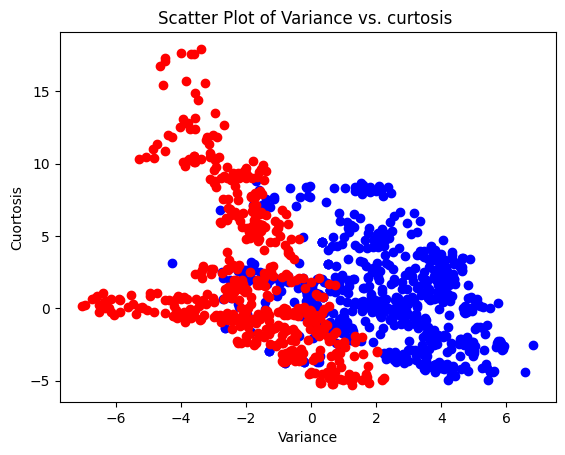

<ipython-input-28-eca28bb33226>:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


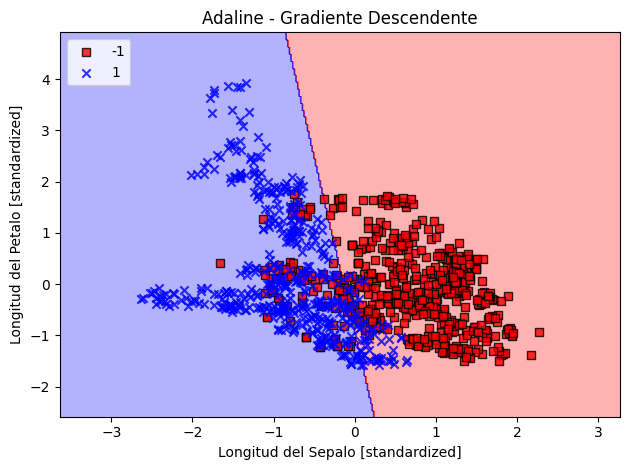

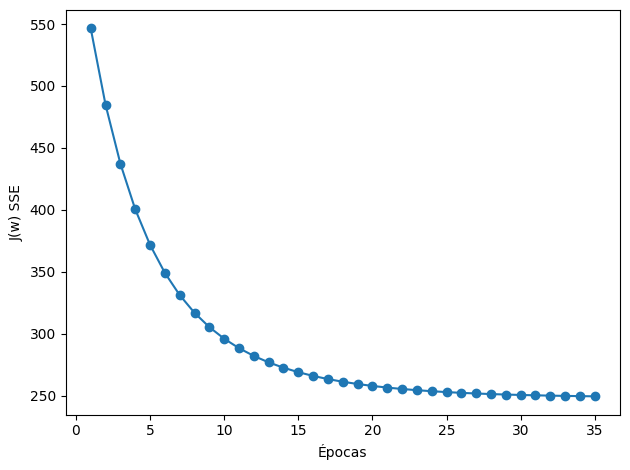

In [ ]:
from matplotlib.colors import ListedColormap

x0 = [X_train1[i][0] for i in range(len(X_train1)) if y_train1[i] == 0]
x1 = [X_train1[i][1] for i in range(len(X_train1)) if y_train1[i] == 0]
plt.scatter(x0, x1, color="blue")
x0 = [X_train1[i][0] for i in range(len(X_train1)) if y_train1[i] == 1]
x1 = [X_train1[i][1] for i in range(len(X_train1)) if y_train1[i] == 1]
plt.scatter(x0, x1, color="red")
plt.xlabel('Variance')
plt.ylabel('Cuortosis')
plt.title('Scatter Plot of Variance vs. curtosis ')
plt.show()

X_std = np.copy(X_train)
X_std[:, 0] = (X_train[:, 0] - X_train[:, 0].mean()) / X_train[:, 0].std()
X_std[:, 1] = (X_train[:, 1] - X_train[:, 1].mean()) / X_train[:, 1].std()

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
ada[-1].fit(X_std, y_train)
plot_decision_regions(X_std, y_train, classifier=ada[-1])
plt.title('Adaline - Gradiente Descendente')
plt.xlabel('Longitud del Sepalo [standardized]')
plt.ylabel('Longitud del Petalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.plot(range(1, len(ada[-1].cost_) + 1), ada[-1].cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('J(w) SSE')

plt.tight_layout()

plt.show()


In [ ]:
X_std_train = np.copy(X_test)
X_std_train[:, 0] = (X_std_train[:, 0] - X_train[:, 0].mean()) / X_train[:, 0].std()
X_std_train[:, 1] = (X_std_train[:, 1] - X_train[:, 1].mean()) / X_train[:, 1].std()

y_predictions_ppn_1 = ada[-1].predict(X_std_train)

print("Predicción:", y_predictions_ppn_1)

Predicción: [ 1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1  1
 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1 -1 -1  1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1
  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1
 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1
  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1
 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1
  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1  1
 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1
 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1
 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1]


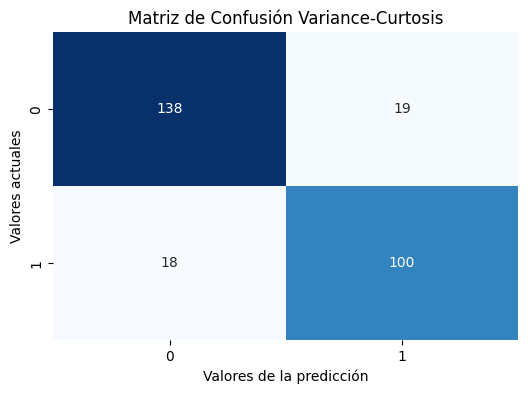

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_ppn_1 = confusion_matrix(y_test, y_predictions_ppn_1)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_ppn_1, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión Variance-Curtosis')
plt.show()

In [ ]:
TP = cm_ppn_1[2][2]
FP = cm_ppn_1[2][1]
FN = cm_ppn_1[0][2]
TN = cm_ppn_1[0][1]

print("Modelo Variance-Curtosis")
print("El valor de exactitud (accuracy) es: " + str((TP+TN)/(TP+FP+FN+TN)))
print("El valor de tasa de error (error_rate) es: " + str(TP/(TP+FP)))
print("El valor de precisión (precision) es: " + str(TP/(TP+FN)))
print("El valor de recall (sensibilidad / sensitivity / true positive rate) es: " + str(TP/(TP+FN)))
print("El valor de especificidad (especificity) es: " + str(TN/(TN+FP)))
print()

IndexError: index 2 is out of bounds for axis 0 with size 2

**Conclusiones:**

Tras implmenetar el Adaline podemos identificar que proporciona mayor pero de acuerdo con las tasas de aprendizaje a través de la misma cantidad de etapas.

Tras realizar el gráfico de la decisión de regiones podemos identificar que después de normalizar los valores de X podemos obtener una separabilidad acertada a pesar del solapamiento que presentan los datos de estas dos características. También que el salto del lambda es mucho menor a través de las épocas en las que se realiza este Adaline.